### 1) Intro to PyTorch

    . Tensor Library
    . Automatic differentiation engine
    . DL Library
    . PyTorch was based on Torch which was written in Lua

In [1]:
# Tensor
import torch

# scalar: rank-0 tensor
a = torch.tensor(1.)
print(a)
print(a.shape)

tensor(1.)
torch.Size([])


In [3]:
# vector: rank-1 tensor
a = torch.tensor([1., 2., 3.])
print(a)
print(a.shape)

tensor([1., 2., 3.])
torch.Size([3])


In [6]:
# matrix: rank-2 tensor - list of list - each sublist reprsent a row 
a = torch.tensor([[1., 2., 3.]
                 ,[2., 3., 4.]])
print(a)
print(a.shape)

tensor([[1., 2., 3.],
        [2., 3., 4.]])
torch.Size([2, 3])


In [7]:
# stack of matrices - 3D tensor - (rank-2 tensor)
a = torch.tensor([[[1., 2., 3.]
                 ,[2., 3., 4.]]
                 ,[[5., 6., 7.]
                 ,[8., 9., 10.]]] )
print(a)
print(a.shape)

tensor([[[ 1.,  2.,  3.],
         [ 2.,  3.,  4.]],

        [[ 5.,  6.,  7.],
         [ 8.,  9., 10.]]])
torch.Size([2, 2, 3])


torch.tensor ~ numpy.array

torch.tensor has GPU support, automatic differentiation support.

All elements have to have the same type(e.g., int, float)

Can't add or remove elements from tensors

### 2.3 Top 10 Tensors Functions and Methods

In [1]:
# creating tensors

import torch
m = torch.Tensor([[1., 2., 3.]
                 ,[4., 5., 6.]])

In [2]:
# Checking the shape
m.shape

torch.Size([2, 3])

In [3]:
# Dimensions
m.ndim

2

In [4]:
# type of datatype
m.dtype

torch.float32

In [5]:
# Create Tensor from Numpy Array
import numpy as np
np_ary = np.array([1., 2., 3.])
m2 = torch.from_numpy(np_ary)

print(m2)

tensor([1., 2., 3.], dtype=torch.float64)


In [6]:
# changing precision
m2 = m2.to(torch.float32)
print(m2.dtype)

torch.float32


In [7]:
# device type
m2.device

device(type='cpu')

In [8]:
# changing shape of tensor
print(m)

print(m.view(3,2))

tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])


In [9]:
print(m.view(-1,2)) # -1 is the magic

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])


In [11]:
# Tensor Transposing
print(m)
print(m.T)

tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


In [ ]:
# Multiplying matrices

In [13]:
a = torch.tensor([[1., 2.], [3., 4.], [5., 6.], [7., 8.]])
a.shape

torch.Size([4, 2])

In [16]:
a = torch.tensor([[1., 2., 3., 4.], [5., 6., 7., 8.]])
a

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]])

In [17]:
a.T

tensor([[1., 5.],
        [2., 6.],
        [3., 7.],
        [4., 8.]])

In [18]:
a = np.array([1, 2])
b = torch.from_numpy(a)
print(a)
print(b)

[1 2]
tensor([1, 2])


In [22]:
b = torch.Tensor(a)
b

tensor([1., 2.])

### 2.4 Improving Code Efficiency with Linear Algebra

In [23]:
# dot product in PyTorch
import torch

b = torch.Tensor([0.])
x = torch.Tensor([1.2, 2.2])
w = torch.Tensor([3.3, 4.3])

x.dot(w) + b

tensor([13.4200])

In [24]:
# same in Python
b = 0
x = [1.2, 2.2]
w = [3.3, 4.3]

output = b
for xi, wi in zip(x, w):
    output += xi*wi

print(output)

13.42


In [25]:
# timing python function
def plain_python(x, w, b):
    output = b
    for xi, wi in zip(x, w):
        output += xi*wi
    return output

In [26]:
import random
random.seed(123)

b = 0
x = [random.random() for _ in range(1000)]
w = [random.random() for _ in range(1000)]

In [28]:
%timeit plain_python(x, w, b)

46.5 µs ± 629 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [32]:
def pytorch_dot(x, w, b):
    return x.dot(w) + b

In [35]:
t_b = torch.tensor(b)
t_x = torch.tensor(x)
t_w = torch.tensor(w)

In [38]:
%timeit pytorch_dot(t_x, t_w, t_b)

4.12 µs ± 126 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


#### Dealing with Multiple training examples via matrix multiplications

In [10]:
b = 0 
X = [[1.2, 2.2],
    [4.4, 5.5]]
w = [3.3, 4.3]

outputs = []
for x in X:
    output = b
    for x_i, w_i in zip(x,w):
        output += x_i*w_i
    outputs.append(output)

outputs

[13.42, 38.17]

In [12]:
import torch

b = torch.tensor([0.])
X = torch.Tensor([[1.2, 2.2],
        [4.4, 5.5]]
)
w = torch.Tensor([3.3, 4.3])
X.matmul(w) + b

tensor([13.4200, 38.1700])

#### Multiplying Two Matrices

In [14]:
import torch
X = torch.rand(100, 10)
W = torch.rand(50, 10)
R = torch.matmul(X, W.T)

In [15]:
R.shape

torch.Size([100, 50])

#### Broadcasting — Computations with Unequal Tensor Shapes

In [16]:
a = torch.tensor([1.1, 2.1, 3.1, 4.1])
b = torch.tensor([5.6])

a+b

tensor([6.7000, 7.7000, 8.7000, 9.7000])

#### Quiz

In [19]:
# calculate dot product
a = torch.Tensor([1.2, 5.1, -4.6])
b = torch.Tensor([-2.1, 3.1, 5.5])
a.dot(b)

tensor(-12.0100)

In [21]:
# Multiply 2 matrices
A = torch.Tensor([[1, 2], [3, 4]])
B = torch.Tensor([[5, 6], [7, 8]])

A.matmul(B)

tensor([[19., 22.],
        [43., 50.]])

In [26]:
a = torch.tensor([[1., 2.],[3., 4.]])
a + torch.tensor([[5., 6.], [7., 8.]])

tensor([[ 6.,  8.],
        [10., 12.]])

### 2.5 Debugging Code

In [27]:
import random

random.seed(123)

b = 0
X = [[random.random() for _ in range(1000)] # 500 rows
    for i in range(500)]
w = [random.random() for _ in range(1000)]


In [30]:
len(X)

500

In [36]:
X[10][10]

0.678827243027483

In [37]:
X[10][10] = 'a'

In [38]:
def my_func(X, w, b):
    outputs = []
    for x in X:
        output = b
        for x_j, w_j in zip(x,w):
            output += x_j * w_j
        outputs.append(output)
    return outputs

In [39]:
my_func(X, w, b)

TypeError: can't multiply sequence by non-int of type 'float'

In [40]:
# one way to debug is using print statement

In [41]:
def my_func(X, w, b):
    outputs = []
    for x in X:
        output = b
        for i, (x_j, w_j) in enumerate(zip(x,w)):
            try:
                output += x_j * w_j
            except:
                import pdb; pdb.post_mortem()
        outputs.append(output)
    return outputs

In [ ]:
my_func(X, w, b)

> /var/folders/f4/h3999llj6ws2l6_72c8nt_0r0000gr/T/ipykernel_21984/1808036201.py(7)my_func()
      5         for i, (x_j, w_j) in enumerate(zip(x,w)):
      6             try:
----> 7                 output += x_j * w_j
      8             except:
      9                 import pdb; pdb.post_mortem()



ipdb>  p w_j


0.10190626841302075


ipdb>  p x_j


'a'


### 2.6 Revisiting the Perceptron Algorithm

In [1]:
%load_ext watermark
%watermark -v -p numpy,pandas,matplotlib,torch

Python implementation: CPython
Python version       : 3.8.15
IPython version      : 8.7.0

numpy     : 1.23.3
pandas    : 1.2.3
matplotlib: 3.3.4
torch     : 1.9.0



In [2]:
import pandas as pd
import torch

In [3]:
df = pd.read_csv('../Unit-1/perceptron_toydata-truncated.txt', sep='\t')
df

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0
5,0.39,-1.99,0
6,-0.49,-2.74,0
7,-0.68,-1.52,0
8,-0.10,-3.43,0
9,-0.05,-1.95,0


In [4]:
X_train = df[["x1", "x2"]].values
y_train = df["label"].values

In [5]:
import torch

X_train = torch.from_numpy(X_train)
y_train = torch.from_numpy(y_train)

In [7]:
X_train.shape

torch.Size([20, 2])

In [8]:
X_train = X_train.to(torch.float32) #computational efficient

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

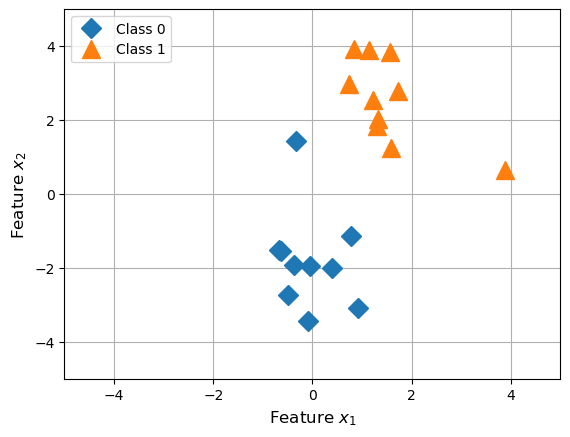

In [10]:
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

In [ ]:
class OldPerceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0.0

    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]

        if weighted_sum_z > 0.0:
            prediction = 1
        else:
            prediction = 0

        return prediction

    def update(self, x, true_y):
        prediction = self.forward(x)
        error = true_y - prediction

        # update
        self.bias += error
        for i, _ in enumerate(self.weights):
            self.weights[i] += error * x[i]

        return error

In [11]:
class TorchPerceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = torch.zeros(num_features)
        self.bias = torch.tensor(0.0)

    def forward(self, x):
        weighted_sum_z = torch.dot(x, self.weights) + self.bias

        if weighted_sum_z > 0.0:
            prediction = torch.tensor(1.)
        else:
            prediction = torch.tensor(0.)

        return prediction

    def update(self, x, true_y):
        prediction = self.forward(x)
        error = true_y - prediction

        # update
        self.bias += error
        self.weights += error + x

        return error

In [13]:
def train(model, all_x, all_y, epochs):

    for epoch in range(epochs):
        error_count = 0

        for x, y in zip(all_x, all_y):
            error = model.update(x, y)
            error_count += abs(error)

        print(f"Epoch {epoch+1} errors {error_count}")

In [14]:
X_train.shape

torch.Size([20, 2])

In [15]:
ppn = TorchPerceptron(num_features=2)

train(model=ppn, all_x=X_train, all_y=y_train, epochs=5)

Epoch 1 errors 13.0
Epoch 2 errors 10.0
Epoch 3 errors 5.0
Epoch 4 errors 2.0
Epoch 5 errors 2.0


In [20]:
def compute_accuracy(model, all_x, all_y):

    correct = 0.0

    for x, y in zip(all_x, all_y):
        prediction = model.forward(x)
        correct += int(prediction == y)

    return correct / len(all_y)

In [21]:
train_acc = compute_accuracy(ppn, X_train, y_train)
train_acc

0.9

### Quiz

In [16]:
a = torch.tensor([1., 2., 3.])
b = torch.tensor([4., 5., 6.])
result = sum([i*j for i, j in zip(a, b)])

In [17]:
result

tensor(32.)

In [18]:
torch.sum(a * b)

tensor(32.)

### 2.7 Seeing Predictive Models as Computation Graphs